In [73]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Image Input

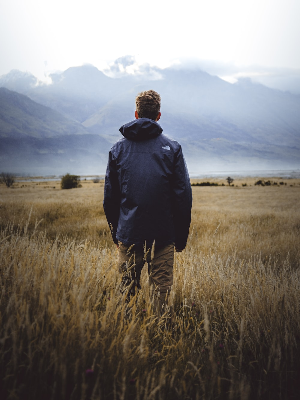

In [6]:
hum_img = cv2.imread('human_image.jpg')
# cv2_imshow(hum_img)
img = cv2.resize(hum_img, (300, 400))
cv2_imshow(img)

# Unsharp Masking & Highboost Filtering

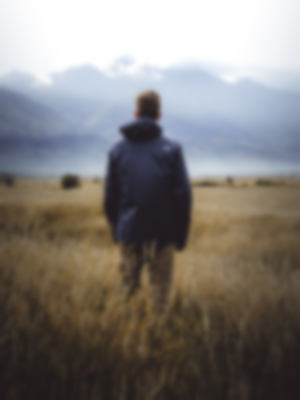

In [79]:
# blur the image
blur_img = cv2.GaussianBlur(img, (7, 7), 0) # image, guassian kernel which specify how much blur the image will be, must be postive and odd, standard deviation
cv2_imshow(blur_img)

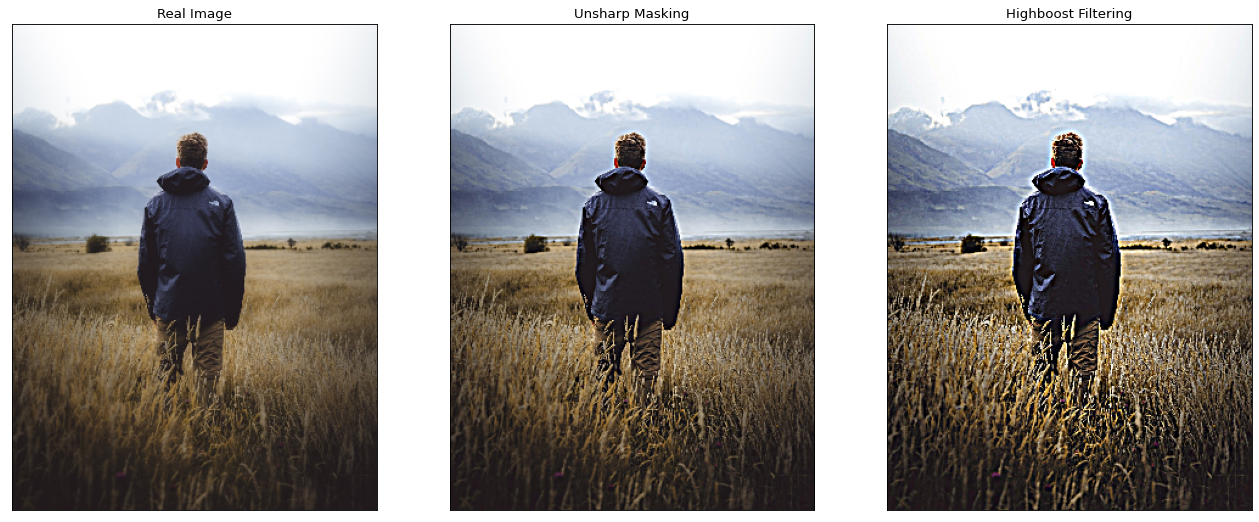

In [80]:
# Apply Unsharp Masking
unsharp_img = cv2.addWeighted(img, 2, blur_img, -1, 0) # k = 1
# cv2_imshow(unsharp_img)

# apply Highboost Filtering
highBoost_img = cv2.addWeighted(img, 4, blur_img, -3, 0) # k = 3


# display using matplotlib
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
unsharp_image = cv2.cvtColor(unsharp_img, cv2.COLOR_BGR2RGB)
highboost_image = cv2.cvtColor(highBoost_img, cv2.COLOR_BGR2RGB)

figure(figsize=(20, 15), dpi=80)
output = [image, unsharp_image, highboost_image]
titles=['Real Image', 'Unsharp Masking', 'Highboost Filtering']
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.imshow(output[i])
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])

plt.show()

#print('\t\tReal Image\t\t\t Unsharp Masking')
#res = np.hstack((img, unsharp_img))
#cv2_imshow(res)

# Second Order Derevative (Laplacian Mask)

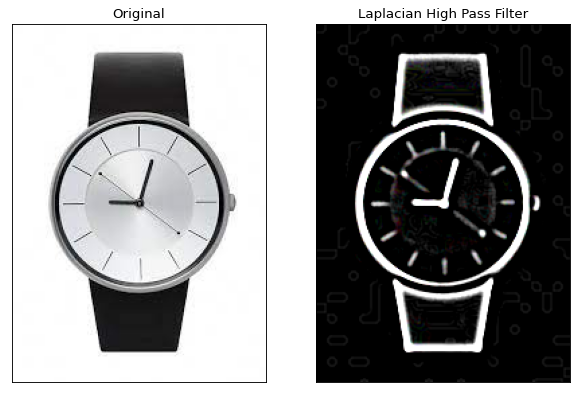

In [98]:
watch_img = cv2.imread('watch_image.jpg')
watch_image = cv2.cvtColor(watch_img, cv2.COLOR_BGR2RGB)

# blur the image
blur_img = cv2.GaussianBlur(watch_img, (13, 13), 0) # image, guassian kernel which specify how much blur the image will be, must be postive and odd, standard deviation
#cv2_imshow(blur_img)

edges = cv2.Laplacian(blur_img, -1, ksize=5, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

output = [watch_image, edges]
titles = ['Original', 'Laplacian High Pass Filter']
figure(figsize=(9, 9), dpi=80)

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Sobel Operator

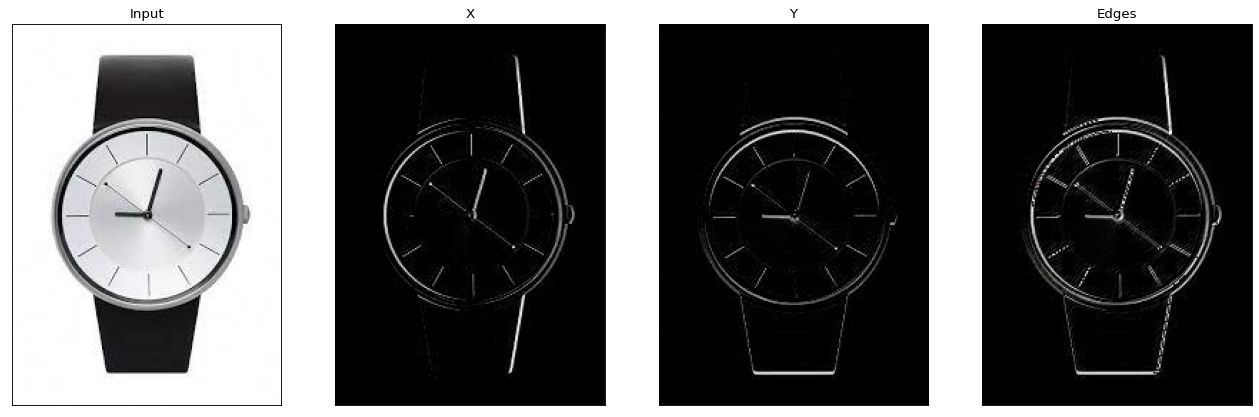

In [94]:
edgesx = cv2.Sobel(watch_image, -1, dx=1, dy=0, ksize=1)
edgesy = cv2.Sobel(watch_image, -1, dx=0, dy=1, ksize=1)

edges = edgesx + edgesy

output = [watch_image, edgesx, edgesy, edges]
titles = ['Input', 'X', 'Y', 'Edges']

figure(figsize=(20, 20), dpi=80)

for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()